In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/2022-01_데이터마이닝이론및응용/0_텀프로젝트/데이터/텀프데이터셋2022년1월_6월.csv')

In [ ]:
df

,일자,시/군/구,시설수,인구수,교통량,승하차,승차건수,차량운행,휴일여부
0,2022-01-01,강남구,17.0,15182.0,123400.0,227057.0,38.0,297.0,1.0
1,2022-01-01,강동구,13.0,18614.0,82512.0,114019.0,30.0,297.0,1.0
2,2022-01-01,강북구,8.0,17395.0,87392.7,65767.0,14.0,297.0,1.0
3,2022-01-01,강서구,17.0,28546.0,136910.0,105170.0,92.0,297.0,1.0
4,2022-01-01,관악구,9.0,20211.0,63307.0,140191.0,13.0,297.0,1.0
...,...,...,...,...,...,...,...,...,...
4520,2022-06-30,용산구,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4521,2022-06-30,은평구,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4522,2022-06-30,종로구,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4523,2022-06-30,중구,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop(['휴일여부','승차건수'], axis=1)

In [ ]:
df

,일자,시/군/구,시설수,인구수,교통량,승하차,차량운행
0,2022-01-01,강남구,17.0,15182.0,123400.0,227057.0,297.0
1,2022-01-01,강동구,13.0,18614.0,82512.0,114019.0,297.0
2,2022-01-01,강북구,8.0,17395.0,87392.7,65767.0,297.0
3,2022-01-01,강서구,17.0,28546.0,136910.0,105170.0,297.0
4,2022-01-01,관악구,9.0,20211.0,63307.0,140191.0,297.0
...,...,...,...,...,...,...,...
4520,2022-06-30,용산구,NaN,NaN,NaN,NaN,NaN
4521,2022-06-30,은평구,NaN,NaN,NaN,NaN,NaN
4522,2022-06-30,종로구,NaN,NaN,NaN,NaN,NaN
4523,2022-06-30,중구,NaN,NaN,NaN,NaN,NaN


In [ ]:
time = df[df['일자']<'2022-04-01']
time

,일자,시/군/구,시설수,인구수,교통량,승하차,차량운행
0,2022-01-01,강남구,17.0,15182.0,123400.0,227057.0,297.0
1,2022-01-01,강동구,13.0,18614.0,82512.0,114019.0,297.0
2,2022-01-01,강북구,8.0,17395.0,87392.7,65767.0,297.0
3,2022-01-01,강서구,17.0,28546.0,136910.0,105170.0,297.0
4,2022-01-01,관악구,9.0,20211.0,63307.0,140191.0,297.0
...,...,...,...,...,...,...,...
2245,2022-03-31,용산구,6.0,7686.0,235080.0,172765.0,558.0
2246,2022-03-31,은평구,10.0,21756.0,48955.0,302792.0,558.0
2247,2022-03-31,종로구,4.0,5929.0,65631.0,516732.0,558.0
2248,2022-03-31,중구,8.0,5634.0,60765.0,630907.0,558.0


In [ ]:
df_predict = df[df['일자']>='2022-04-01']
df_predict

,일자,시/군/구,시설수,인구수,교통량,승하차,차량운행
2250,2022-04-01,강남구,NaN,NaN,NaN,NaN,NaN
2251,2022-04-01,강동구,NaN,NaN,NaN,NaN,NaN
2252,2022-04-01,강북구,NaN,NaN,NaN,NaN,NaN
2253,2022-04-01,강서구,NaN,NaN,NaN,NaN,NaN
2254,2022-04-01,관악구,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4520,2022-06-30,용산구,NaN,NaN,NaN,NaN,NaN
4521,2022-06-30,은평구,NaN,NaN,NaN,NaN,NaN
4522,2022-06-30,종로구,NaN,NaN,NaN,NaN,NaN
4523,2022-06-30,중구,NaN,NaN,NaN,NaN,NaN


In [ ]:
predict_regions_df = {x: y for x, y in df_predict.groupby('시/군/구')}

In [ ]:
df['시/군/구'].nunique()

25

In [ ]:
df['시/군/구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [ ]:
seoul_list = df['시/군/구'].unique()

In [ ]:
dict_of_regions_df = {x: y for x, y in  time.groupby('시/군/구')}

In [ ]:
dict_of_regions_df['강남구']

,일자,시/군/구,시설수,인구수,교통량,승하차,차량운행
0,2022-01-01,강남구,17.0,15182.0,123400.0,227057.0,297.0
25,2022-01-02,강남구,17.0,15182.0,126198.0,265606.0,254.0
50,2022-01-03,강남구,17.0,15182.0,161348.0,889835.0,575.0
75,2022-01-04,강남구,17.0,15182.0,168749.0,924453.0,558.0
100,2022-01-05,강남구,17.0,15182.0,171125.0,926657.0,563.0
...,...,...,...,...,...,...,...
2125,2022-03-27,강남구,17.0,15182.0,142010.0,304962.0,218.0
2150,2022-03-28,강남구,17.0,15182.0,171719.0,821644.0,528.0
2175,2022-03-29,강남구,17.0,15182.0,175259.0,841618.0,521.0
2200,2022-03-30,강남구,17.0,15182.0,170438.0,834349.0,538.0


In [ ]:
int(dict_of_regions_df['강남구']['시설수'].unique())

17

In [ ]:
predict_regions_df['강남구']['시설수']

2250   NaN
2275   NaN
2300   NaN
2325   NaN
2350   NaN
        ..
4400   NaN
4425   NaN
4450   NaN
4475   NaN
4500   NaN
Name: 시설수, Length: 91, dtype: float64

In [ ]:
predict_regions_df['강남구']['시설수'] = int(dict_of_regions_df['강남구']['시설수'].unique())
predict_regions_df['강남구']['인구수'] = int(dict_of_regions_df['강남구']['인구수'].unique())
predict_regions_df['강남구']

,일자,시/군/구,시설수,인구수,교통량,승하차,차량운행
2250,2022-04-01,강남구,17,15182,NaN,NaN,NaN
2275,2022-04-02,강남구,17,15182,NaN,NaN,NaN
2300,2022-04-03,강남구,17,15182,NaN,NaN,NaN
2325,2022-04-04,강남구,17,15182,NaN,NaN,NaN
2350,2022-04-05,강남구,17,15182,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4400,2022-06-26,강남구,17,15182,NaN,NaN,NaN
4425,2022-06-27,강남구,17,15182,NaN,NaN,NaN
4450,2022-06-28,강남구,17,15182,NaN,NaN,NaN
4475,2022-06-29,강남구,17,15182,NaN,NaN,NaN


In [ ]:
dict_of_regions_df['강남구']

,일자,시/군/구,시설수,인구수,교통량,승하차,차량운행
0,2022-01-01,강남구,17.0,15182.0,123400.0,227057.0,297.0
25,2022-01-02,강남구,17.0,15182.0,126198.0,265606.0,254.0
50,2022-01-03,강남구,17.0,15182.0,161348.0,889835.0,575.0
75,2022-01-04,강남구,17.0,15182.0,168749.0,924453.0,558.0
100,2022-01-05,강남구,17.0,15182.0,171125.0,926657.0,563.0
...,...,...,...,...,...,...,...
2125,2022-03-27,강남구,17.0,15182.0,142010.0,304962.0,218.0
2150,2022-03-28,강남구,17.0,15182.0,171719.0,821644.0,528.0
2175,2022-03-29,강남구,17.0,15182.0,175259.0,841618.0,521.0
2200,2022-03-30,강남구,17.0,15182.0,170438.0,834349.0,538.0


In [ ]:
df = dict_of_regions_df['강남구'][['일자','교통량']]

In [ ]:
df

,일자,교통량
0,2022-01-01,123400.0
25,2022-01-02,126198.0
50,2022-01-03,161348.0
75,2022-01-04,168749.0
100,2022-01-05,171125.0
...,...,...
2125,2022-03-27,142010.0
2150,2022-03-28,171719.0
2175,2022-03-29,175259.0
2200,2022-03-30,170438.0


In [ ]:
df.columns = ['ds','y']

In [ ]:
from fbprophet import Prophet 

In [ ]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=91, freq='d')

forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,145003.036612,120162.081444,158419.787009,145003.036612,145003.036612,-5991.290003,-5991.290003,-5991.290003,-5991.290003,-5991.290003,-5991.290003,0.0,0.0,0.0,139011.746609
1,2022-01-02,145234.486905,101736.674349,139773.537132,145234.486905,145234.486905,-24240.020260,-24240.020260,-24240.020260,-24240.020260,-24240.020260,-24240.020260,0.0,0.0,0.0,120994.466645
2,2022-01-03,145465.937199,126662.229265,164823.957119,145465.937199,145465.937199,1650.562937,1650.562937,1650.562937,1650.562937,1650.562937,1650.562937,0.0,0.0,0.0,147116.500136
3,2022-01-04,145697.387493,130837.406304,169788.391655,145697.387493,145697.387493,4188.382691,4188.382691,4188.382691,4188.382691,4188.382691,4188.382691,0.0,0.0,0.0,149885.770184
4,2022-01-05,145928.837787,126687.884631,163731.527506,145928.837787,145928.837787,-856.038197,-856.038197,-856.038197,-856.038197,-856.038197,-856.038197,0.0,0.0,0.0,145072.799590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2022-06-26,186061.955848,142163.210690,180918.961482,186026.848033,186099.031041,-24240.020260,-24240.020260,-24240.020260,-24240.020260,-24240.020260,-24240.020260,0.0,0.0,0.0,161821.935588
177,2022-06-27,186295.549951,167852.645328,206362.627598,186259.978588,186333.415854,1650.562937,1650.562937,1650.562937,1650.562937,1650.562937,1650.562937,0.0,0.0,0.0,187946.112889
178,2022-06-28,186529.144055,171092.815265,210169.733592,186493.030428,186567.220868,4188.382691,4188.382691,4188.382691,4188.382691,4188.382691,4188.382691,0.0,0.0,0.0,190717.526746
179,2022-06-29,186762.738158,167488.707949,205237.755064,186726.059903,186801.414361,-856.038197,-856.038197,-856.038197,-856.038197,-856.038197,-856.038197,0.0,0.0,0.0,185906.699961


가장 눈여겨 볼만한 컬럼은 yhat, yhat_lower, yhat_upper이다. 예측값, 하한선, 상한선

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01,139011.746609,120162.081444,158419.787009
1,2022-01-02,120994.466645,101736.674349,139773.537132
2,2022-01-03,147116.500136,126662.229265,164823.957119
3,2022-01-04,149885.770184,130837.406304,169788.391655
4,2022-01-05,145072.799590,126687.884631,163731.527506
...,...,...,...,...
176,2022-06-26,161821.935588,142163.210690,180918.961482
177,2022-06-27,187946.112889,167852.645328,206362.627598
178,2022-06-28,190717.526746,171092.815265,210169.733592
179,2022-06-29,185906.699961,167488.707949,205237.755064


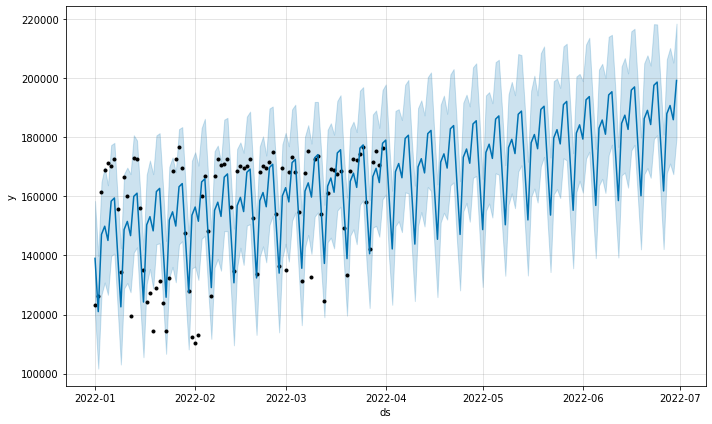

In [ ]:
fig1 = m.plot(forecast)

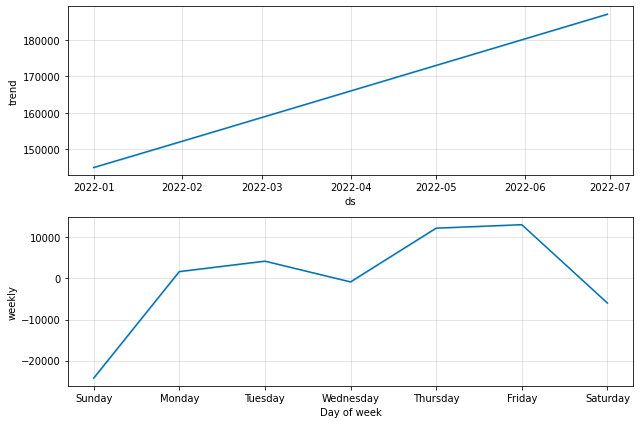

In [ ]:
fig2 = m.plot_components(forecast)

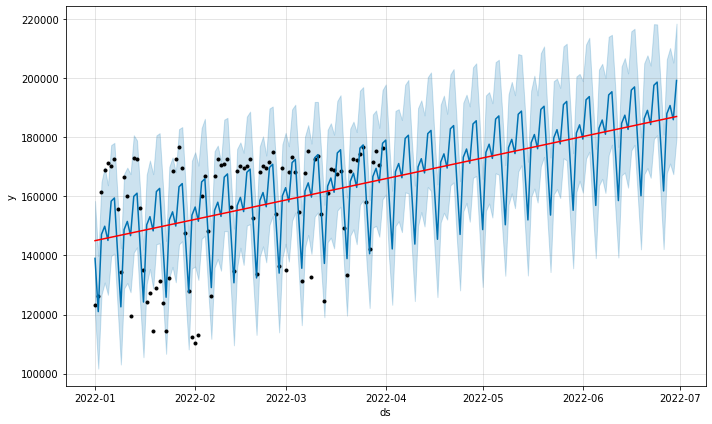

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


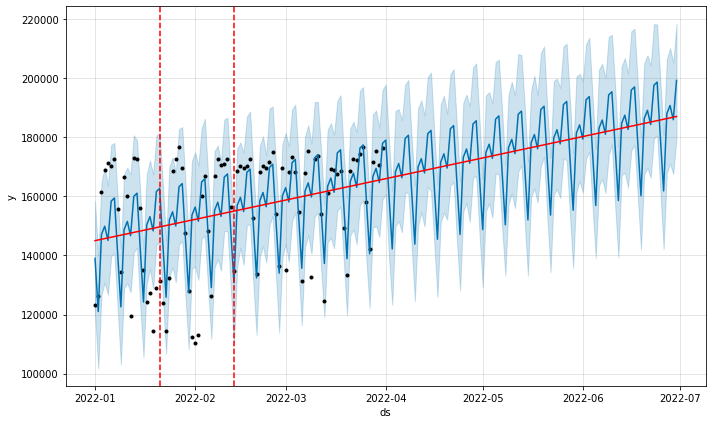

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

m = Prophet(changepoint_prior_scale=0.3)
m.fit(df)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01,139011.746609,120162.081444,158419.787009
1,2022-01-02,120994.466645,101736.674349,139773.537132
2,2022-01-03,147116.500136,126662.229265,164823.957119
3,2022-01-04,149885.770184,130837.406304,169788.391655
4,2022-01-05,145072.799590,126687.884631,163731.527506
...,...,...,...,...
176,2022-06-26,161821.935588,142163.210690,180918.961482
177,2022-06-27,187946.112889,167852.645328,206362.627598
178,2022-06-28,190717.526746,171092.815265,210169.733592
179,2022-06-29,185906.699961,167488.707949,205237.755064


In [ ]:
pred = forecast['yhat']
pred

0      139011.746609
1      120994.466645
2      147116.500136
3      149885.770184
4      145072.799590
           ...      
176    161821.935588
177    187946.112889
178    190717.526746
179    185906.699961
180    199199.411062
Name: yhat, Length: 181, dtype: float64

In [ ]:
pred[:90]

0     139011.746609
1     120994.466645
2     147116.500136
3     149885.770184
4     145072.799590
          ...      
85    140564.872190
86    166689.049491
87    169460.463348
88    164649.636563
89    177942.347664
Name: yhat, Length: 90, dtype: float64

In [ ]:
df['y']

0       123400.0
25      126198.0
50      161348.0
75      168749.0
100     171125.0
          ...   
2125    142010.0
2150    171719.0
2175    175259.0
2200    170438.0
2225    176421.0
Name: y, Length: 90, dtype: float64

In [ ]:
from sklearn.metrics import r2_score
r2_score = r2_score(df['y'],pred[:90])
print(r2_score)

0.4492639182368259


In [ ]:
predict_regions_df[x][col] = pred[90:]

## 코드 자동화

In [ ]:
from fbprophet import Prophet 

In [ ]:
df = dict_of_regions_df['강남구']

In [ ]:
df

,일자,시/군/구,시설수,인구수,교통량,승하차,차량운행
0,2022-01-01,강남구,17.0,15182.0,123400.0,227057.0,297.0
25,2022-01-02,강남구,17.0,15182.0,126198.0,265606.0,254.0
50,2022-01-03,강남구,17.0,15182.0,161348.0,889835.0,575.0
75,2022-01-04,강남구,17.0,15182.0,168749.0,924453.0,558.0
100,2022-01-05,강남구,17.0,15182.0,171125.0,926657.0,563.0
...,...,...,...,...,...,...,...
2125,2022-03-27,강남구,17.0,15182.0,142010.0,304962.0,218.0
2150,2022-03-28,강남구,17.0,15182.0,171719.0,821644.0,528.0
2175,2022-03-29,강남구,17.0,15182.0,175259.0,841618.0,521.0
2200,2022-03-30,강남구,17.0,15182.0,170438.0,834349.0,538.0


In [ ]:
predict_regions_df['강남구']

,일자,시/군/구,시설수,인구수,교통량,승하차,차량운행
2250,2022-04-01,강남구,17,15182,NaN,NaN,NaN
2275,2022-04-02,강남구,17,15182,NaN,NaN,NaN
2300,2022-04-03,강남구,17,15182,NaN,NaN,NaN
2325,2022-04-04,강남구,17,15182,NaN,NaN,NaN
2350,2022-04-05,강남구,17,15182,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4400,2022-06-26,강남구,17,15182,NaN,NaN,NaN
4425,2022-06-27,강남구,17,15182,NaN,NaN,NaN
4450,2022-06-28,강남구,17,15182,NaN,NaN,NaN
4475,2022-06-29,강남구,17,15182,NaN,NaN,NaN


In [ ]:
for x in seoul_list:
  predict_regions_df[x]['시설수'] = int(dict_of_regions_df[x]['시설수'].unique())
  predict_regions_df[x]['인구수'] = int(dict_of_regions_df[x]['인구수'].unique())
  for col in ['교통량', '승하차', '차량운행'] :
    df = dict_of_regions_df[x][['일자', col]]
    df.columns = ['ds','y']
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=91, freq='d')
    forecast = m.predict(future)
    pred = forecast['yhat']
    predict_regions_df[x][col] = list(pred[90:])

In [ ]:
predict_regions_df['강남구']

,일자,시/군/구,시설수,인구수,교통량,승하차,차량운행
2250,2022-04-01,강남구,17,15182,179018.186996,850383.094702,546.552496
2275,2022-04-02,강남구,17,15182,160215.167067,424715.293489,294.835528
2300,2022-04-03,강남구,17,15182,142200.030913,243143.372978,235.145152
2325,2022-04-04,강남구,17,15182,168324.208214,764236.423579,526.991858
2350,2022-04-05,강남구,17,15182,171095.622071,737709.340785,494.762909
...,...,...,...,...,...,...,...
4400,2022-06-26,강남구,17,15182,161821.935588,162383.182723,219.748662
4425,2022-06-27,강남구,17,15182,187946.112889,683476.233326,511.595368
4450,2022-06-28,강남구,17,15182,190717.526746,656949.150531,479.366420
4475,2022-06-29,강남구,17,15182,185906.699961,662769.777974,475.445050


In [ ]:
seoul_list

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [ ]:
seoul_list_not_gangnam = ['강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

In [ ]:
predict_regions_df['강동구']

,일자,시/군/구,시설수,인구수,교통량,승하차,차량운행
2251,2022-04-01,강동구,13,18614,212591.327964,270272.992841,546.552496
2276,2022-04-02,강동구,13,18614,189957.370573,169736.792793,294.835528
2301,2022-04-03,강동구,13,18614,177470.546959,122736.330262,235.145152
2326,2022-04-04,강동구,13,18614,200984.447688,246354.923762,526.991858
2351,2022-04-05,강동구,13,18614,196445.640299,239722.642812,494.762909
...,...,...,...,...,...,...,...
4401,2022-06-26,강동구,13,18614,194424.646145,106615.325536,219.748662
4426,2022-06-27,강동구,13,18614,217938.546874,230233.919036,511.595368
4451,2022-06-28,강동구,13,18614,213399.739485,223601.638086,479.366420
4476,2022-06-29,강동구,13,18614,204483.756396,227612.989236,475.445050


In [ ]:
df

,ds,y
24,2022-01-01,297.0
49,2022-01-02,254.0
74,2022-01-03,575.0
99,2022-01-04,558.0
124,2022-01-05,563.0
...,...,...
2149,2022-03-27,218.0
2174,2022-03-28,528.0
2199,2022-03-29,521.0
2224,2022-03-30,538.0


In [ ]:
pred_df = predict_regions_df['강남구']

In [ ]:
for city in seoul_list_not_gangnam :
  pred_df = pred_df.append(predict_regions_df[city])
  pred_df = pred_df.reset_index(drop=True)

In [ ]:
pred_df

,일자,시/군/구,시설수,인구수,교통량,승하차,차량운행
0,2022-04-01,강남구,17,15182,179018.186996,850383.094702,546.552496
1,2022-04-02,강남구,17,15182,160215.167067,424715.293489,294.835528
2,2022-04-03,강남구,17,15182,142200.030913,243143.372978,235.145152
3,2022-04-04,강남구,17,15182,168324.208214,764236.423579,526.991858
4,2022-04-05,강남구,17,15182,171095.622071,737709.340785,494.762909
...,...,...,...,...,...,...,...
2270,2022-06-26,중랑구,3,20357,195218.185340,70218.990066,219.748662
2271,2022-06-27,중랑구,3,20357,206606.766776,142625.527321,511.595368
2272,2022-06-28,중랑구,3,20357,208012.392642,139293.622743,479.366420
2273,2022-06-29,중랑구,3,20357,208418.385817,140318.472166,475.445050


In [ ]:
time

,일자,시/군/구,시설수,인구수,교통량,승하차,차량운행
0,2022-01-01,강남구,17.0,15182.0,123400.0,227057.0,297.0
1,2022-01-01,강동구,13.0,18614.0,82512.0,114019.0,297.0
2,2022-01-01,강북구,8.0,17395.0,87392.7,65767.0,297.0
3,2022-01-01,강서구,17.0,28546.0,136910.0,105170.0,297.0
4,2022-01-01,관악구,9.0,20211.0,63307.0,140191.0,297.0
...,...,...,...,...,...,...,...
2245,2022-03-31,용산구,6.0,7686.0,235080.0,172765.0,558.0
2246,2022-03-31,은평구,10.0,21756.0,48955.0,302792.0,558.0
2247,2022-03-31,종로구,4.0,5929.0,65631.0,516732.0,558.0
2248,2022-03-31,중구,8.0,5634.0,60765.0,630907.0,558.0


In [ ]:
final_df = time.append(pred_df)

In [ ]:
final_df = final_df.sort_values(['일자','시/군/구'])
final_df

,일자,시/군/구,시설수,인구수,교통량,승하차,차량운행
0,2022-01-01,강남구,17.0,15182.0,123400.000000,227057.000000,297.000000
1,2022-01-01,강동구,13.0,18614.0,82512.000000,114019.000000,297.000000
2,2022-01-01,강북구,8.0,17395.0,87392.700000,65767.000000,297.000000
3,2022-01-01,강서구,17.0,28546.0,136910.000000,105170.000000,297.000000
4,2022-01-01,관악구,9.0,20211.0,63307.000000,140191.000000,297.000000
...,...,...,...,...,...,...,...
1910,2022-06-30,용산구,6.0,7686.0,256647.011330,156572.982914,524.754239
2001,2022-06-30,은평구,10.0,21756.0,36254.616583,285052.946371,524.754239
2092,2022-06-30,종로구,4.0,5929.0,65680.576781,477071.300605,524.754239
2183,2022-06-30,중구,8.0,5634.0,60855.241637,574429.403244,524.754239


In [ ]:
final_df = final_df.reset_index(drop=True)

In [ ]:
final_df.to_csv('/content/drive/Shareddrives/2022-01_데이터마이닝이론및응용/0_텀프로젝트/데이터/텀프데이터셋2022년1월_6월_prophet_결측치채우기완.csv', index=False, encoding='utf-8-sig')